In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os


In [2]:
merged_dir = "../../../data/merged"
image_dir = "../../../images/DT"
train_file_path = os.path.join(merged_dir, "train_downsampled.parquet")
train_data = pd.read_parquet(train_file_path)
test_file_path = os.path.join(merged_dir, "test_data.parquet")
test_data = pd.read_parquet(test_file_path)

In [3]:
# Prepare features and labels
X_train = train_data.drop(columns=['fire','longitude', 'latitude']).to_numpy()
y_train = train_data['fire'].to_numpy()

X_test = test_data.drop(columns=['fire','longitude', 'latitude']).to_numpy()
y_test = test_data['fire'].to_numpy()

In [4]:
import sys
from pathlib import Path

# Add the folders where the .py files live
sys.path.append(str(Path('../../../code/myModels').resolve()))
sys.path.append(str(Path('../../../code/Metrics').resolve()))

# Now import
from DecisionTree import MyDecisionTree
from classification import ClassificationMetrics, evaluate_predictions


In [5]:
# free up memory

import gc
gc.collect()

0

In [6]:
tree = MyDecisionTree(max_depth=15, min_samples_split=100, n_bins=100, chunk_size=10000)
tree.fit(X_train, y_train)


Starting tree training with 7066 samples...
[Depth 0] Processing root node with 7066 samples
Evaluating 58 features...
-> Split node #1: X[26] <= -0.4024 (IG=0.0731)
  [Depth 1] 1405 samples, 2 classes
  Evaluating 58 features...
  -> Split node #2: X[0] <= 0.3072 (IG=0.0928)
    [Depth 2] 1183 samples, 2 classes
    Evaluating 58 features...
    -> Split node #3: X[14] <= -0.5975 (IG=0.0249)
      [Depth 3] 54 samples, 2 classes
      -> Leaf node #4: class=0 (min samples)
      [Depth 3] 1129 samples, 2 classes
      Evaluating 58 features...
      -> Split node #5: X[31] <= 0.5000 (IG=0.0180)
        [Depth 4] 763 samples, 2 classes
        Evaluating 58 features...
        -> Split node #6: X[17] <= 1.0000 (IG=0.0372)
          [Depth 5] 610 samples, 2 classes
          Evaluating 58 features...
          -> Split node #7: X[12] <= -0.7042 (IG=0.0314)
            [Depth 6] 150 samples, 2 classes
            Evaluating 58 features...
            -> Split node #8: X[26] <= -0.4799 (

In [7]:
y_pred = tree.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

y_true = y_test

# 1️⃣ Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = np.unique(np.concatenate([y_true, y_pred]))

# Pretty-print confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=labels, columns=labels))

# 2️⃣ Classification report (precision, recall, f1-score)
report = classification_report(y_true, y_pred, digits=3)
print("\nClassification Report:")
print(report)



Confusion Matrix:
      0     1
0  4509  3067
1   257   626

Classification Report:
              precision    recall  f1-score   support

           0      0.946     0.595     0.731      7576
           1      0.170     0.709     0.274       883

    accuracy                          0.607      8459
   macro avg      0.558     0.652     0.502      8459
weighted avg      0.865     0.607     0.683      8459



[Text(0.19313304721030042, 0.9375, 'X26 <= -0.402'),
 Text(0.15879828326180256, 0.875, 'X0 <= 0.307'),
 Text(0.004291845493562232, 0.8125, 'X14 <= -0.598'),
 Text(0.0, 0.75, 'class = 0'),
 Text(0.12446351931330472, 0.75, 'X31 <= 0.500'),
 Text(0.1072961373390558, 0.6875, 'X17 <= 1.000'),
 Text(0.02145922746781116, 0.625, 'X12 <= -0.704'),
 Text(0.012875536480686695, 0.5625, 'X26 <= -0.480'),
 Text(0.008583690987124463, 0.5, 'class = 0'),
 Text(0.017167381974248927, 0.5, 'class = 0'),
 Text(0.030042918454935622, 0.5625, 'X24 <= -0.493'),
 Text(0.02575107296137339, 0.5, 'class = 0'),
 Text(0.09871244635193133, 0.5, 'X1 <= 0.529'),
 Text(0.0815450643776824, 0.4375, 'X24 <= -0.188'),
 Text(0.07296137339055794, 0.375, 'X24 <= -0.200'),
 Text(0.03862660944206009, 0.3125, 'X29 <= -1.250'),
 Text(0.034334763948497854, 0.25, 'class = 0'),
 Text(0.04721030042918455, 0.25, 'X30 <= 0.429'),
 Text(0.04291845493562232, 0.1875, 'class = 0'),
 Text(0.06437768240343347, 0.1875, 'X13 <= 0.005'),
 Text(0

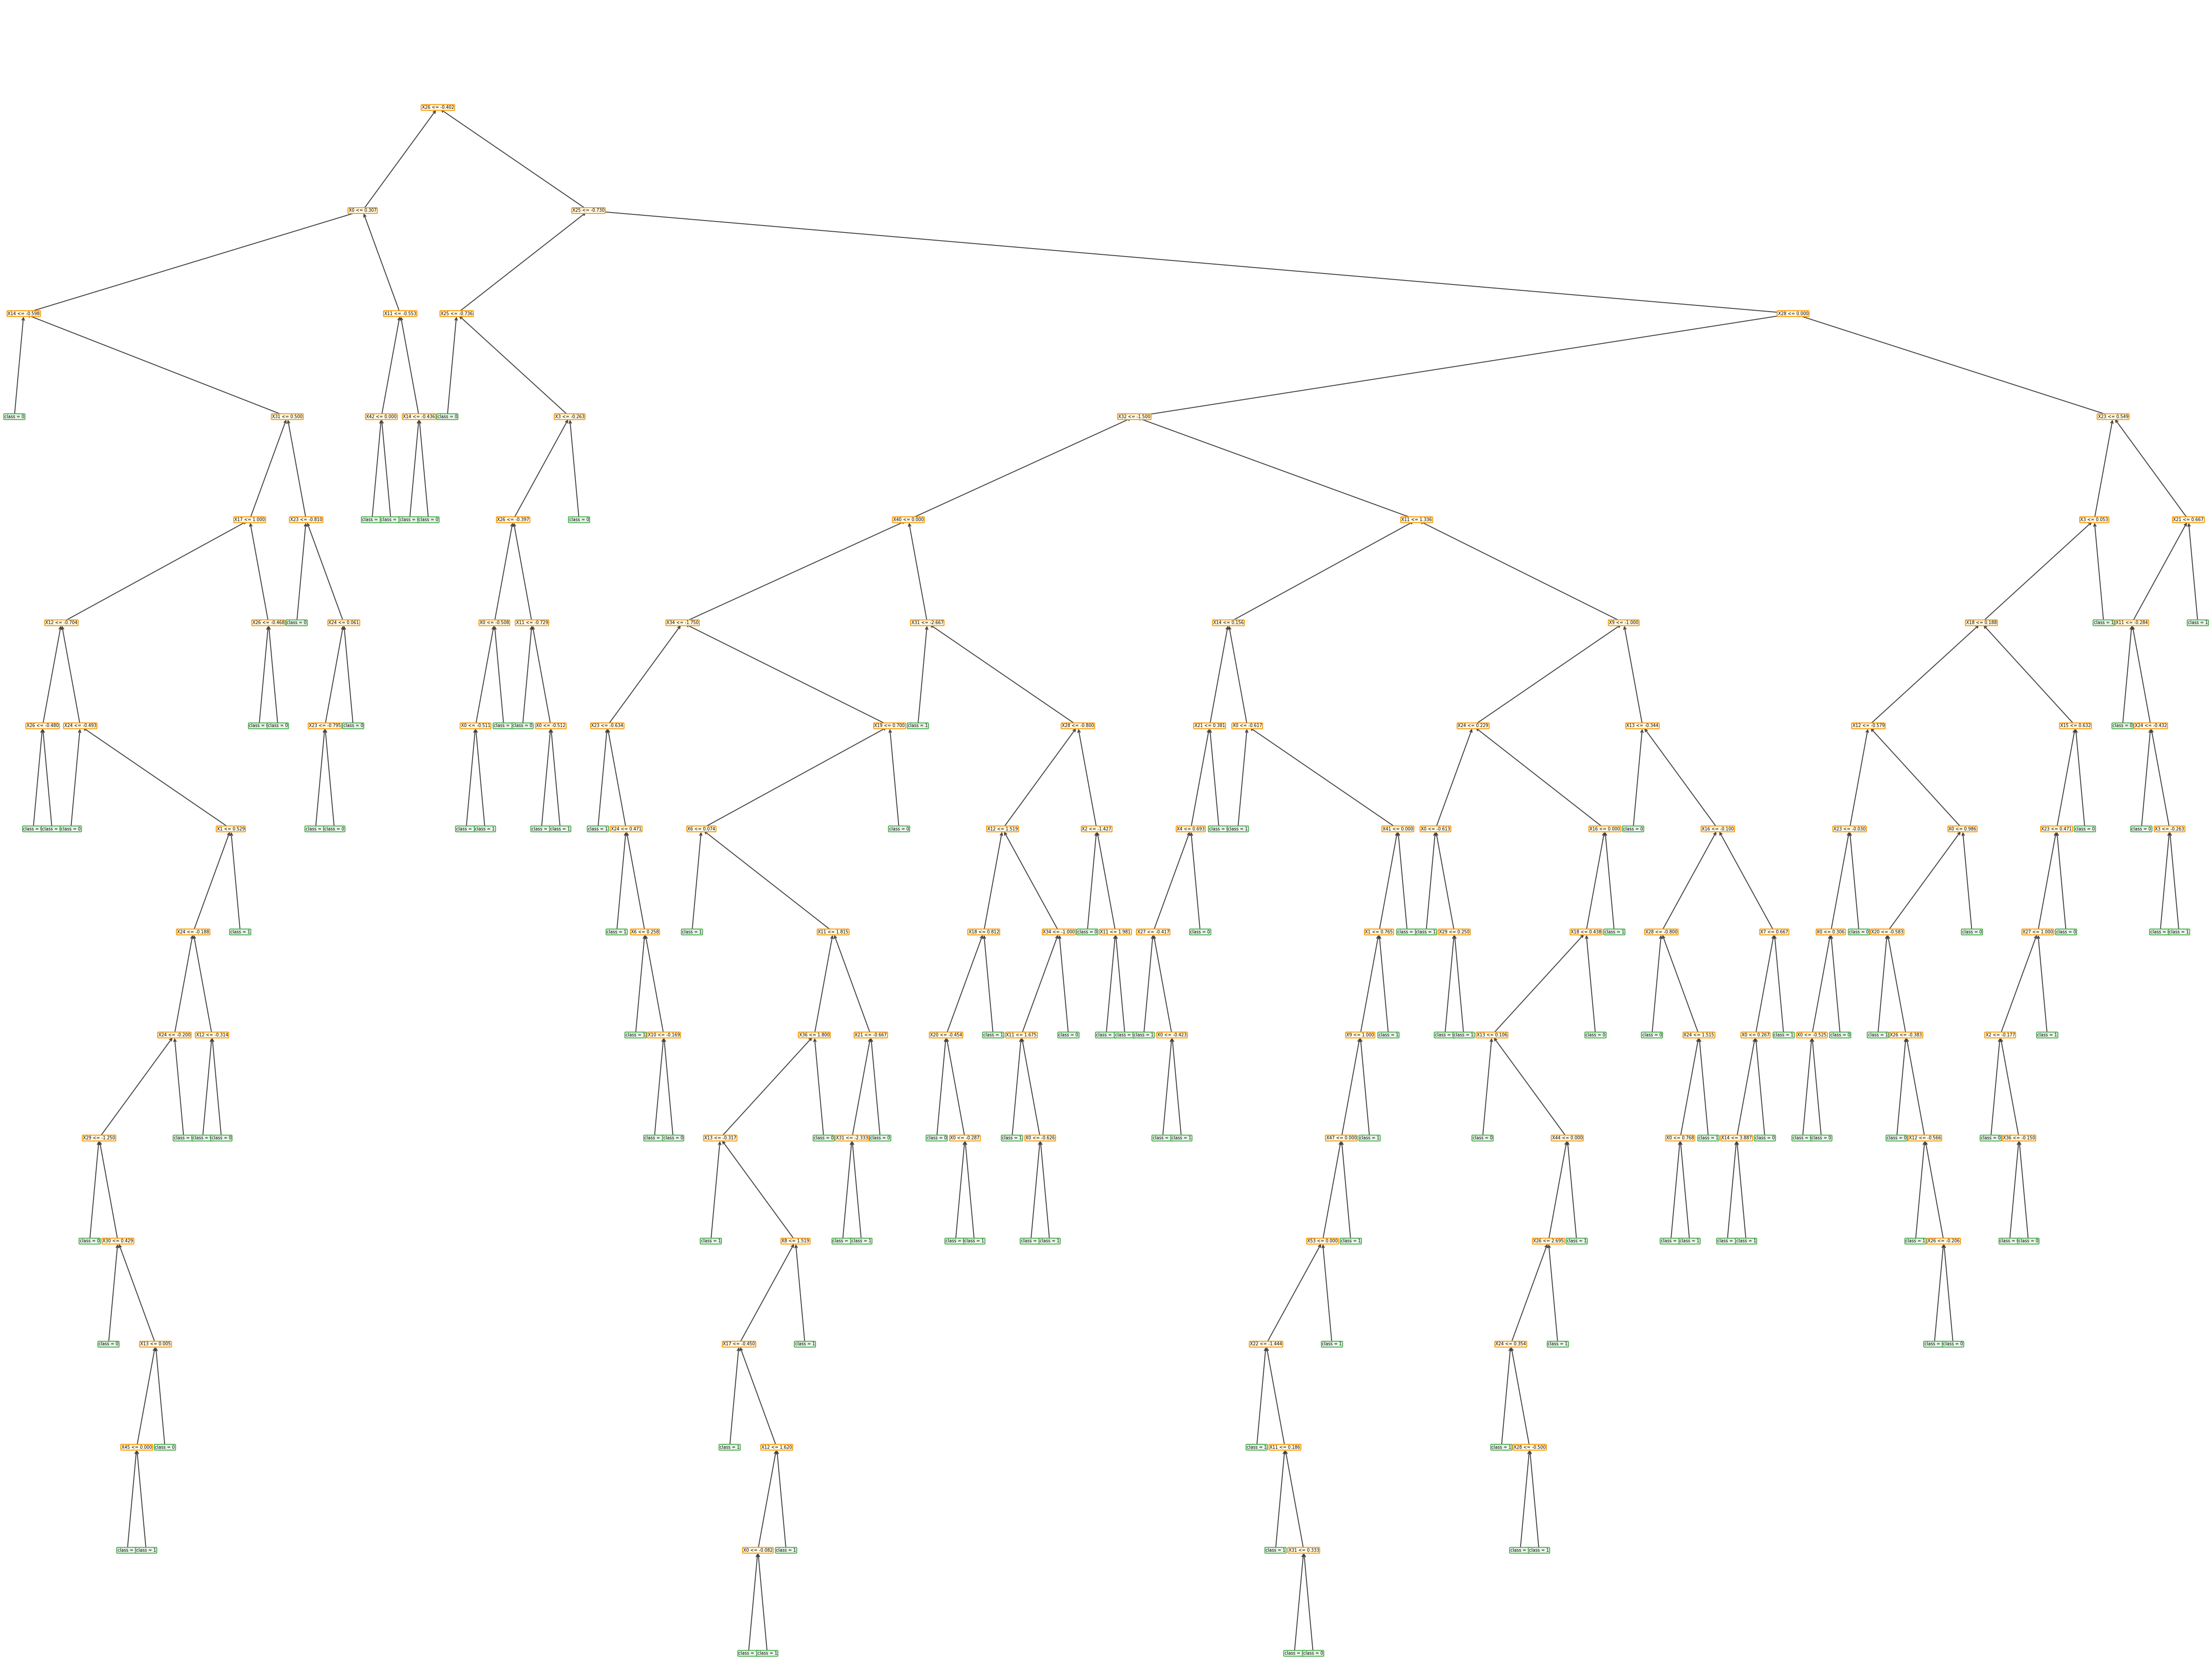

In [9]:
# Plot the tree
n_features = X_train.shape[1]
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"X{i}" for i in range(n_features)]
tree.plot(feature_names=feature_names)  # Shows full tree now!

In [10]:
# Show feature importances
print("\nFeature Importances:")
importances = tree.feature_importances()
for feat_idx, importance in sorted(importances.items(), key=lambda x: x[1], reverse=True):
    print(f"  X{feat_idx}: {importance:.4f}")


Feature Importances:
  X26: 0.2235
  X25: 0.1507
  X0: 0.1218
  X14: 0.0818
  X11: 0.0773
  X28: 0.0542
  X23: 0.0471
  X3: 0.0392
  X31: 0.0316
  X42: 0.0251
  X32: 0.0251
  X24: 0.0189
  X21: 0.0161
  X17: 0.0126
  X40: 0.0126
  X12: 0.0116
  X18: 0.0078
  X34: 0.0071
  X9: 0.0067
  X13: 0.0038
  X19: 0.0031
  X16: 0.0031
  X15: 0.0031
  X1: 0.0024
  X6: 0.0024
  X2: 0.0020
  X4: 0.0016
  X27: 0.0016
  X41: 0.0016
  X20: 0.0012
  X29: 0.0010
  X7: 0.0008
  X36: 0.0006
  X10: 0.0004
  X47: 0.0002
  X44: 0.0002
  X30: 0.0001
  X8: 0.0001
  X53: 0.0001
  X22: 0.0000
  X45: 0.0000


In [11]:
# map feature importances to feature names
feature_names = train_data.drop(columns=['fire', 'longitude', 'latitude']).columns if hasattr(train_data, 'columns') else [f"X{i}" for i in range(n_features)]
importance_dict = {feature_names[feat_idx]: importance for feat_idx, importance in importances.items()}
# print with feature names
print("\nFeature Importances with Names:")
for feat_name, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"  {feat_name}: {importance:.4f}")


Feature Importances with Names:
  prec_iqr_winter: 0.2235
  prec_iqr_summer: 0.1507
  elevation: 0.1218
  prec_median_winter: 0.0818
  prec_median_autumn: 0.0773
  tmin_iqr_spring: 0.0542
  prec_iqr_autumn: 0.0471
  CLAY: 0.0392
  tmax_iqr_autumn: 0.0316
  LCCCode_0011: 0.0251
  tmax_iqr_spring: 0.0251
  prec_iqr_spring: 0.0189
  tmax_median_summer: 0.0161
  tmin_median_summer: 0.0126
  LCCCode_0004 // 0003: 0.0126
  prec_median_spring: 0.0116
  tmin_median_winter: 0.0078
  tmax_iqr_winter: 0.0071
  ESP: 0.0067
  prec_median_summer: 0.0038
  tmax_median_autumn: 0.0031
  tmin_median_spring: 0.0031
  tmin_median_autumn: 0.0031
  COARSE: 0.0024
  TOTAL_N: 0.0024
  SAND: 0.0020
  TCARBON_EQ: 0.0016
  tmin_iqr_autumn: 0.0016
  LCCCode_0010: 0.0016
  tmax_median_spring: 0.0012
  tmin_iqr_summer: 0.0010
  CN_RATIO: 0.0008
  prec_min: 0.0006
  GYPSUM: 0.0004
  LCCCode_21446 // 21450-121340 / 21454: 0.0002
  LCCCode_11498: 0.0002
  tmin_iqr_winter: 0.0001
  CEC_SOIL: 0.0001
  LCCCode_21518: 0.

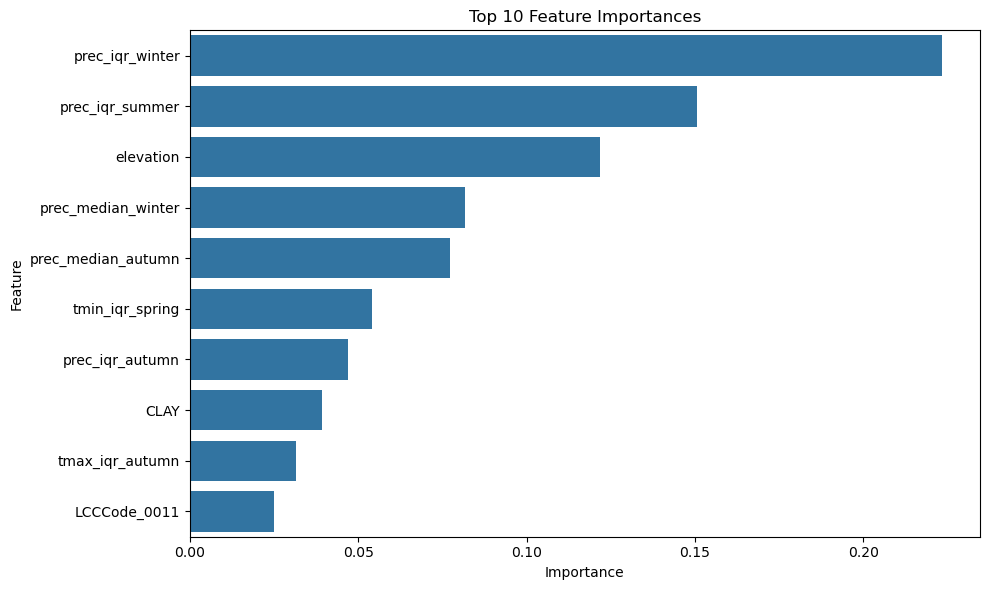

In [12]:
# Plot top 10 feature importances with their names
top_n = 10
top_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
feat_names, feat_importances = zip(*top_features)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(feat_importances), y=list(feat_names))
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
savepath = os.path.join(image_dir, "decision_tree_nearmiss_feature_importances.png")
plt.savefig(savepath)
plt.show()


In [13]:
# save predictions, y_pred with their true labels and the model
import pickle
output_dir = "../../models/decision_tree"
os.makedirs(output_dir, exist_ok=True)
with open(os.path.join(output_dir, "y_test.pkl"), "wb") as f:
    pickle.dump(y_test, f)
with open(os.path.join(output_dir, "y_pred.pkl"), "wb") as f:
    pickle.dump(y_pred, f)
with open(os.path.join(output_dir, "decision_tree_nearmiss_model.pkl"), "wb") as f:
    pickle.dump(tree, f)
